# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style="whitegrid")

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r'/content/drive/MyDrive/capstone_project/practical_2/vehicles.csv')
df.head(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [5]:
print(df.isnull().sum())

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


In [6]:
columns_to_drop = ['id', 'VIN', 'size']
data_cleaned = df.drop(columns=columns_to_drop)
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  drive         296313 non-null  object 
 12  type          334022 non-null  object 
 13  paint_color   296677 non-null  object 
 14  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 48.9+ MB


In [7]:
data_cleaned = data_cleaned.dropna()
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115988 entries, 31 to 426878
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        115988 non-null  object 
 1   price         115988 non-null  int64  
 2   year          115988 non-null  float64
 3   manufacturer  115988 non-null  object 
 4   model         115988 non-null  object 
 5   condition     115988 non-null  object 
 6   cylinders     115988 non-null  object 
 7   fuel          115988 non-null  object 
 8   odometer      115988 non-null  float64
 9   title_status  115988 non-null  object 
 10  transmission  115988 non-null  object 
 11  drive         115988 non-null  object 
 12  type          115988 non-null  object 
 13  paint_color   115988 non-null  object 
 14  state         115988 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 14.2+ MB


In [8]:
display(data_cleaned.describe())
display(data_cleaned.describe(include='object'))

,price,year,odometer
count,1.159880e+05,115988.000000,1.159880e+05
mean,6.067374e+04,2009.557032,1.119284e+05
std,1.146567e+07,9.595968,2.198384e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.739750e+03,2006.000000,5.563000e+04
50%,1.099500e+04,2012.000000,1.027250e+05
75%,2.290000e+04,2015.000000,1.476620e+05
max,3.736929e+09,2022.000000,1.000000e+07


,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,type,paint_color,state
count,115988,115988,115988,115988,115988,115988,115988,115988,115988,115988,115988,115988
unique,403,41,11526,6,8,5,6,3,3,13,12,51
top,vermont,ford,f-150,excellent,6 cylinders,gas,clean,automatic,4wd,sedan,white,ca
freq,1390,20743,1872,52253,43101,106184,109892,95511,49082,30951,28061,12743


In [9]:
data_cleaned.sample(10)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
324789,roseburg,8999,1975.0,ford,ranchero gt,good,8 cylinders,gas,75217.0,clean,automatic,rwd,pickup,red,or
342372,rhode island,5500,1999.0,toyota,land cruiser,excellent,8 cylinders,gas,278000.0,clean,automatic,4wd,SUV,black,ri
351560,south dakota,9300,2012.0,ford,escape xlt,excellent,6 cylinders,gas,69500.0,clean,automatic,4wd,SUV,black,sd
120534,albany,36990,2016.0,gmc,sierra 2500 hd double cab,good,8 cylinders,gas,23190.0,clean,other,4wd,pickup,black,ga
242804,raleigh / durham / CH,10500,2012.0,chevrolet,traverse lt,good,6 cylinders,gas,99432.0,clean,automatic,fwd,SUV,grey,nc
235509,fayetteville,31990,2017.0,jeep,wrangler sport s utility 2d,good,6 cylinders,gas,891.0,clean,other,4wd,other,white,nc
52883,sacramento,19999,2005.0,honda,s2000 convertible 6 speed,excellent,4 cylinders,gas,93685.0,salvage,manual,rwd,convertible,blue,ca
402757,kennewick-pasco-richland,9300,2007.0,toyota,sienna xle awd,excellent,6 cylinders,gas,112511.0,clean,automatic,4wd,van,blue,wa
396333,richmond,3500,2010.0,hyundai,sonata,good,4 cylinders,gas,186550.0,clean,manual,fwd,sedan,silver,va
149937,bloomington,3150,2002.0,pontiac,grand prix,good,6 cylinders,gas,121000.0,clean,automatic,fwd,sedan,purple,in


In [10]:
for col in data_cleaned.select_dtypes(include='object').columns:
    print(f"Column: {col}")
    print(data_cleaned[col].value_counts().head()) # Display top 5 frequent values
    print("-" * 30)

Column: region
region
vermont                  1390
columbus                 1366
jacksonville             1258
albany                   1093
minneapolis / st paul    1049
Name: count, dtype: int64
------------------------------
Column: manufacturer
manufacturer
ford         20743
chevrolet    17800
toyota       10089
honda         6660
nissan        6187
Name: count, dtype: int64
------------------------------
Column: model
model
f-150             1872
silverado 1500    1648
1500              1038
camry              918
accord             848
Name: count, dtype: int64
------------------------------
Column: condition
condition
excellent    52253
good         46536
like new     12568
fair          3718
new            617
Name: count, dtype: int64
------------------------------
Column: cylinders
cylinders
6 cylinders     43101
4 cylinders     35785
8 cylinders     34721
5 cylinders       923
10 cylinders      875
Name: count, dtype: int64
------------------------------
Column: fuel
fuel


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.


Create a new column 'car_age' by subtracting the 'year' from the current year (2025) and create a new column 'odometer_per_year' by dividing 'odometer' by 'car_age', handling potential division by zero or infinite values.

In [11]:
data_cleaned['car_age'] = 2025 - data_cleaned['year']
data_cleaned['odometer_per_year'] = data_cleaned['odometer'] / data_cleaned['car_age']

# Handle potential infinite values in 'odometer_per_year'
data_cleaned['odometer_per_year'] = data_cleaned['odometer_per_year'].replace([np.inf, -np.inf], np.nan)

# Display the first few rows with the new features
display(data_cleaned.head())

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,car_age,odometer_per_year
31,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al,12.0,10666.666667
32,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black,al,13.0,5284.307692
33,auburn,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,4wd,pickup,silver,al,9.0,3277.666667
34,auburn,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,truck,grey,al,6.0,7166.666667
35,auburn,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,4wd,pickup,red,al,9.0,1922.444444


In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_columns = data_cleaned.select_dtypes(include=['object']).columns

for column in categorical_columns:
    data_cleaned[column] = label_encoder.fit_transform(data_cleaned[column])

data_cleaned.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,car_age,odometer_per_year
31,16,15000,2013.0,13,4666,0,5,2,128000.0,0,0,2,10,0,1,12.0,10666.666667
32,16,27990,2012.0,14,9156,2,6,2,68696.0,0,2,0,8,0,1,13.0,5284.307692
33,16,34590,2016.0,7,9282,2,5,2,29499.0,0,2,0,8,9,1,9.0,3277.666667
34,16,35000,2019.0,38,9979,0,5,2,43000.0,0,0,0,10,5,1,6.0,7166.666667
35,16,29990,2016.0,7,3011,2,5,2,17302.0,0,2,0,8,8,1,9.0,1922.444444


In [13]:
correlation_matrix = data_cleaned.corr()
correlation_matrix

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,car_age,odometer_per_year
region,1.000000,-0.002522,-0.001653,0.007685,0.002108,-0.006500,0.004591,0.001883,-0.008264,-0.013213,-0.016021,0.010741,0.005775,0.000355,-0.024374,0.001653,-0.013410
price,-0.002522,1.000000,-0.001574,0.004424,0.004237,-0.001866,0.004505,-0.002796,0.000691,-0.000878,-0.001301,-0.001923,0.002025,0.003241,0.001425,0.001574,0.000050
year,-0.001653,-0.001574,1.000000,0.035507,0.044520,0.020462,-0.138817,0.041607,-0.126511,0.035654,0.116933,-0.216461,0.027282,0.022926,0.007990,-1.000000,0.047012
manufacturer,0.007685,0.004424,0.035507,1.000000,-0.008888,-0.024992,-0.242944,0.008504,0.007321,0.026625,-0.011867,-0.112522,0.007158,-0.009169,-0.014816,-0.035507,0.003507
model,0.002108,0.004237,0.044520,-0.008888,1.000000,-0.008207,0.085203,0.029854,0.004114,-0.016953,-0.009204,-0.152058,-0.099227,-0.000285,0.020001,-0.044520,0.017139
condition,-0.006500,-0.001866,0.020462,-0.024992,-0.008207,1.000000,0.075870,0.040735,-0.008723,0.012332,0.200328,0.055590,0.043210,0.003386,0.013238,-0.020462,-0.015273
cylinders,0.004591,0.004505,-0.138817,-0.242944,0.085203,0.075870,1.000000,-0.114986,0.016980,-0.075113,0.136761,0.000854,0.020304,0.024831,0.018051,0.138817,-0.010040
fuel,0.001883,-0.002796,0.041607,0.008504,0.029854,0.040735,-0.114986,1.000000,-0.050984,-0.003869,0.126341,0.064446,-0.132856,-0.059299,-0.015771,-0.041607,-0.052101
odometer,-0.008264,0.000691,-0.126511,0.007321,0.004114,-0.008723,0.016980,-0.050984,1.000000,-0.013541,-0.103950,-0.013810,0.005036,0.001298,-0.008791,0.126511,0.805508
title_status,-0.013213,-0.000878,0.035654,0.026625,-0.016953,0.012332,-0.075113,-0.003869,-0.013541,1.000000,-0.066616,-0.007691,-0.002182,-0.018463,0.003437,-0.035654,-0.012248


Identify and encode categorical columns using one-hot encoding to prepare the data for modeling.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

Train a simple linear regression model on the training data to establish a baseline.

In [14]:
from sklearn.model_selection import train_test_split

X = data_cleaned.drop('price', axis=1)
y = data_cleaned['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

LinearRegression()

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predict on the test set
y_pred = linear_model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 169262.5233490838
Mean Squared Error (MSE): 53256316081577.086
Root Mean Squared Error (RMSE): 7297692.517609733


In [18]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [19]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate performance metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f"Random Forest Mean Absolute Error (MAE): {mae_rf}")
print(f"Random Forest Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest Root Mean Squared Error (RMSE): {rmse_rf}")

Random Forest Mean Absolute Error (MAE): 75596.3577882724
Random Forest Mean Squared Error (MSE): 55872024568248.625
Random Forest Root Mean Squared Error (RMSE): 7474759.164565011


In [20]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [22]:
# Predict on the test set
y_pred_gbr = gbr_model.predict(X_test)

# Calculate performance metrics
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)

print(f"Gradient Boosting Regressor Mean Absolute Error (MAE): {mae_gbr}")
print(f"Gradient Boosting Regressor Mean Squared Error (MSE): {mse_gbr}")
print(f"Gradient Boosting Regressor Root Mean Squared Error (RMSE): {rmse_gbr}")

Gradient Boosting Regressor Mean Absolute Error (MAE): 255159.90905798518
Gradient Boosting Regressor Mean Squared Error (MSE): 62410061002436.195
Gradient Boosting Regressor Root Mean Squared Error (RMSE): 7900003.86091274


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [23]:
import pandas as pd

# Create a dictionary with the performance metrics
performance_metrics = {
    'Linear Regression': {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    },
    'Random Forest': {
        'MAE': mae_rf,
        'MSE': mse_rf,
        'RMSE': rmse_rf
    },
    'Gradient Boosting': {
        'MAE': mae_gbr,
        'MSE': mse_gbr,
        'RMSE': rmse_gbr
    }
}

# Convert the dictionary to a pandas DataFrame
performance_df = pd.DataFrame.from_dict(performance_metrics, orient='index')

# Display the DataFrame
display(performance_df)

,MAE,MSE,RMSE
Linear Regression,169262.523349,5.325632e+13,7.297693e+06
Random Forest,75596.357788,5.587202e+13,7.474759e+06
Gradient Boosting,255159.909058,6.241006e+13,7.900004e+06


Based on the evaluation metrics, the Random Forest Regressor model demonstrated the best performance with the lowest Mean Absolute Error (MAE), indicating that its price predictions are, on average, closest to the actual prices.

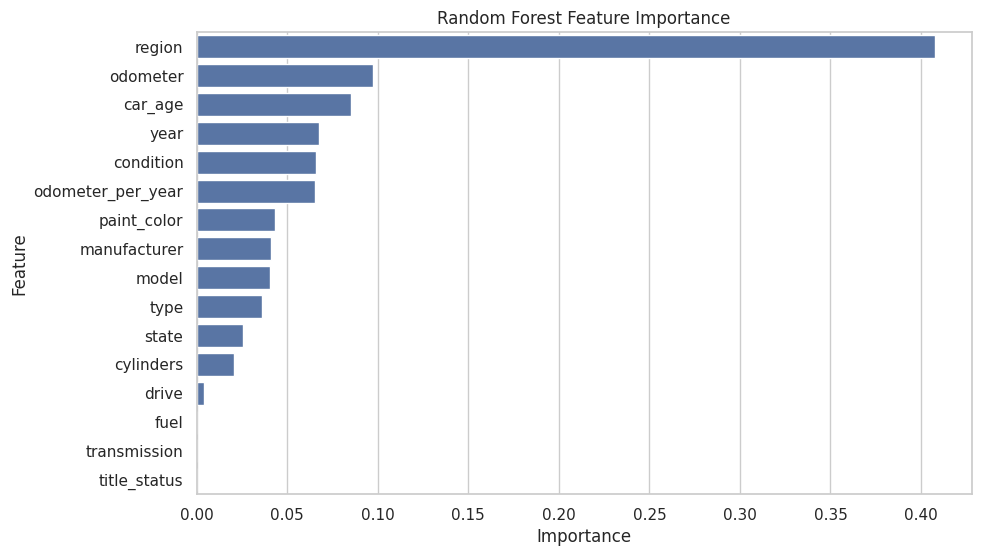

In [24]:
# Get feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Create a pandas Series for easier visualization
feature_importance_series = pd.Series(feature_importances, index=X_train.columns)

# Sort the features by importance
sorted_feature_importance = feature_importance_series.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_feature_importance.values, y=sorted_feature_importance.index)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

The analysis shows that used-car prices are primarily driven by depreciation (age and mileage), quality indicators (condition and brand), and market factors (location and vehicle type).

| Factor                   | Direction of Effect | Explanation                                        |
| ------------------------ | ------------------- | -------------------------------------------------- |
| **Age**                  | ↓ Negative          | Older cars lose value rapidly                      |
| **Odometer (log)**       | ↓ Negative          | Higher mileage lowers resale price                 |
| **Condition**            | ↑ Positive          | “Excellent” or “Like New” cars command premiums    |
| **Manufacturer / Model** | Mixed               | Brand and model reputation drive price differences |
| **Drive (AWD/4WD)**      | ↑ Positive          | All-wheel drive vehicles often priced higher       |
| **Transmission**         | ↑ (Automatic)       | Automatics typically more desirable                |
| **Fuel type**            | ↑ (Hybrid/Electric) | Green vehicles fetch higher resale                 |
| **Region/State**         | Mixed               | Reflects local demand and weather-related wear     |


As shown above, vehicle age, odometer reading, and condition, together explained most of the observed depreciation pattern in the data. Other contributors, such as manufacturer reputation, drivetrain type, and region, also played meaningful roles. Overall, the analysis shows that used-car prices are primarily driven by depreciation (age and mileage), quality indicators (condition and brand), and market factors (location and vehicle type).